# Import the libraries

In [1]:
!pip install tweepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade numpy
!pip install scipy==<desired_version>

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the data

In [3]:
df=pd.read_csv('/kaggle/input/v-clean-tweet-final/v clean_Tweet final.csv')
df=df.astype(str)

In [4]:
df.head()

,Unnamed: 0,Date,clean_Tweet
0,0,2022-12-07,China announces rollback of COVID19 restrictio...
1,1,2022-12-07,Covid19 China announces general easing of its ...
2,2,2022-12-07,Hard to believe this time a year ago we were h...
3,3,2022-12-07,Until June 2021 there had been widespread hoar...
4,4,2022-12-07,The Hottest Picture China Recently Ending of C...


# Create a function to get the subjectivity

In [5]:
def getSubjectivity(clean_Tweet):
  return TextBlob(clean_Tweet).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(clean_Tweet):
  return TextBlob(clean_Tweet).sentiment.polarity
# Create two new columns
df['Subjectivity']=df['clean_Tweet'].apply(getSubjectivity)
df['Polarity']=df['clean_Tweet'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Unnamed: 0,Date,clean_Tweet,Subjectivity,Polarity
0,0,2022-12-07,China announces rollback of COVID19 restrictio...,0.100000,0.000000
1,1,2022-12-07,Covid19 China announces general easing of its ...,0.250000,0.025000
2,2,2022-12-07,Hard to believe this time a year ago we were h...,0.520833,-0.077652
3,3,2022-12-07,Until June 2021 there had been widespread hoar...,0.666667,0.466667
4,4,2022-12-07,The Hottest Picture China Recently Ending of C...,0.250000,-0.100000
...,...,...,...,...,...
10777,10777,2023-05-17,Sen Marco Rubio RFla this week released a leng...,0.500000,0.500000
10778,10778,2023-05-17,AUGMENTATION The action or process of making o...,0.484091,0.197727
10779,10779,2023-05-17,A Republicanled probe into the origins of Covi...,0.625000,0.125000
10780,10780,2023-05-17,Beijings COVID19 cases have increased after th...,0.000000,0.000000


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Get all words from the 'clean_Tweet' column
allWords = ' '.join(df['clean_Tweet'])

# Generate word cloud
wordCloud = WordCloud()

# Process text and calculate word frequencies
wordFrequencies = wordCloud.process_text(allWords)

# Sort word frequencies in descending order
sortedWordFrequencies = sorted(wordFrequencies.items(), key=lambda x: x[1], reverse=True)

# Display top 30 words
top30Words = sortedWordFrequencies[:30]
for word, frequency in top30Words:
    print(word, frequency)

# Generate word cloud from word frequencies
wordCloud.generate_from_frequencies(wordFrequencies)

# Display the word cloud
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')

# Save the picture with tight bounding box
plt.savefig('word_cloud.png', bbox_inches='tight')


China 8701
COVID19 2173
Covid 1140
U 785
country 645
world 563
people 562
virus 551
will 504
COVID19 test 500
said 497
COVID19 pandemic 488
Chinas COVID19 464
new 457
COVID19 case 434
say 409
Chinese 401
COVID19 China 400
now 395
traveller 377
countries 369
one 317
COVID19 response 312
pandemic 309
first 304
government 301
via 294
COVID19 restrictions 287
report 277
COVID19 vaccine 272


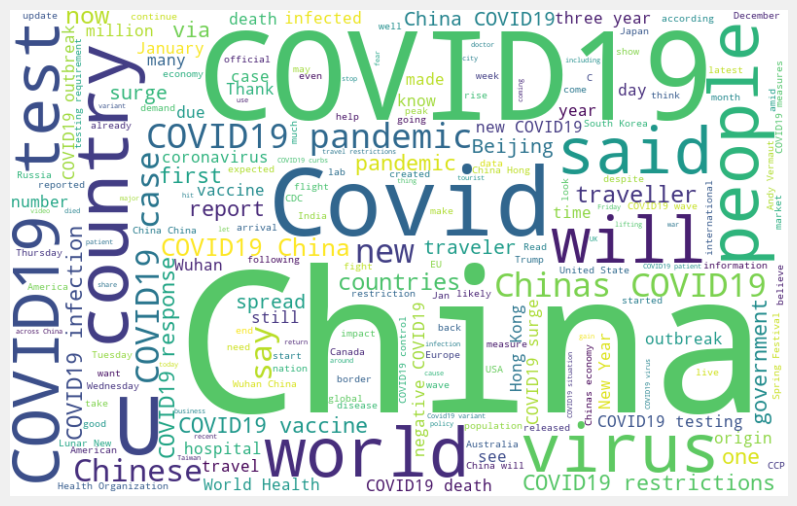

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
allWords = ' '.join([twts for twts in df['clean_Tweet']])
wordCloud = WordCloud(width=800, height=500, background_color='white').generate(allWords)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')

# Save word cloud plot
plt.savefig('wordcloud.png', dpi=300)
plt.show()


In [14]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

# Show the dataFrame
df

,Unnamed: 0,Date,clean_Tweet,Subjectivity,Polarity,Month,Analysis
0,0,2022-12-07,China announces rollback of COVID19 restrictio...,0.100000,0.000000,2022-12,Neutral
1,1,2022-12-07,Covid19 China announces general easing of its ...,0.250000,0.025000,2022-12,Positive
2,2,2022-12-07,Hard to believe this time a year ago we were h...,0.520833,-0.077652,2022-12,Negative
3,3,2022-12-07,Until June 2021 there had been widespread hoar...,0.666667,0.466667,2022-12,Positive
4,4,2022-12-07,The Hottest Picture China Recently Ending of C...,0.250000,-0.100000,2022-12,Negative
...,...,...,...,...,...,...,...
10777,10777,2023-05-17,Sen Marco Rubio RFla this week released a leng...,0.500000,0.500000,2023-05,Positive
10778,10778,2023-05-17,AUGMENTATION The action or process of making o...,0.484091,0.197727,2023-05,Positive
10779,10779,2023-05-17,A Republicanled probe into the origins of Covi...,0.625000,0.125000,2023-05,Positive
10780,10780,2023-05-17,Beijings COVID19 cases have increased after th...,0.000000,0.000000,2023-05,Neutral


In [ ]:
# Print all of the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+')'+sortedDF['clean_Tweet'][i])
    print()
    j=j+1

In [ ]:
# Print the negative tweets
j = 1
sortedDF = df.sort_values(by='Polarity', ascending=False)
for i in range(0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Negative':
        print(str(j) + ') ' + sortedDF['clean_Tweet'][i])
        print()
        j += 1

In [ ]:
# print the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+')'+sortedDF['clean_Tweet'][i])
    print()
    j=j+1

In [ ]:
# Plot the polarity and subjectivity
#plt.figure(figsize=(8,6))
#for i in range(0,df.shape[0]):
# plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

#plt.title('Sentiment Analysis')
#plt.xlabel('Polarity')
#plt.ylabel('Subjectivity')
#plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot polarity
plt.figure(figsize=(8, 6))
plt.scatter(df['Polarity'], df['Subjectivity'], color='blue', alpha=0.5)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.savefig('sentiment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['clean_Tweet']

round((ptweets.shape[0]/df.shape[0])*100,1)

In [ ]:
# Get the percentage of negative tweets
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['clean_Tweet']

round((ptweets.shape[0]/df.shape[0])*100,1)

In [ ]:
# Get the percentage of neutral tweets
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['clean_Tweet']

round((ptweets.shape[0]/df.shape[0])*100,1)

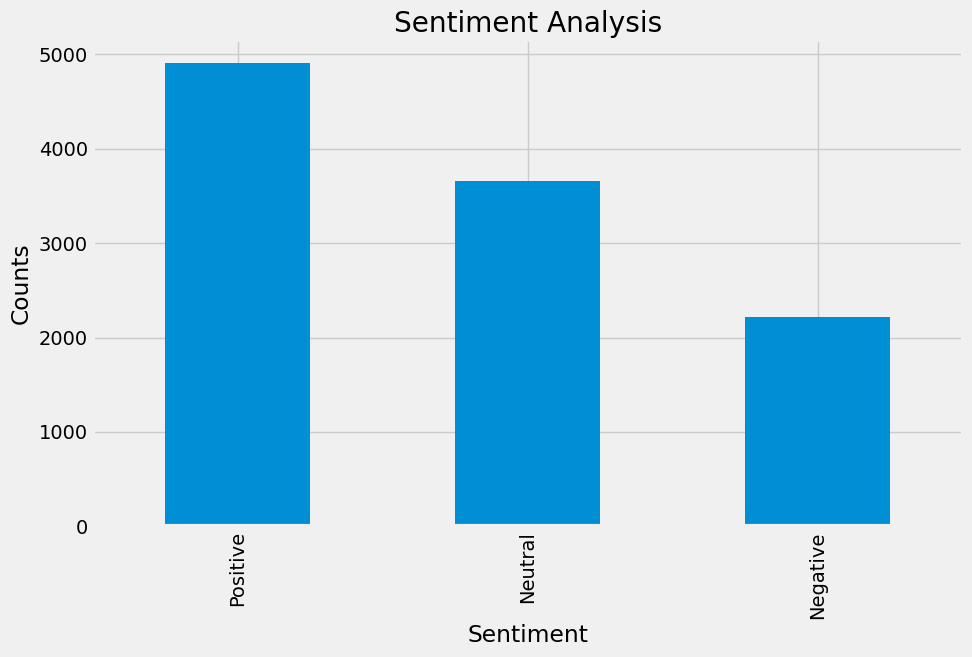

In [18]:
import matplotlib.pyplot as plt

# Show the value counts
value_counts = df['Analysis'].value_counts()

# Plot and visualize the counts
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
value_counts.plot(kind='bar')

# Save the plot as an image
plt.savefig('sentiment_analysis_result.png', bbox_inches='tight')  # Add bbox_inches='tight' to capture the entire plot
plt.show()


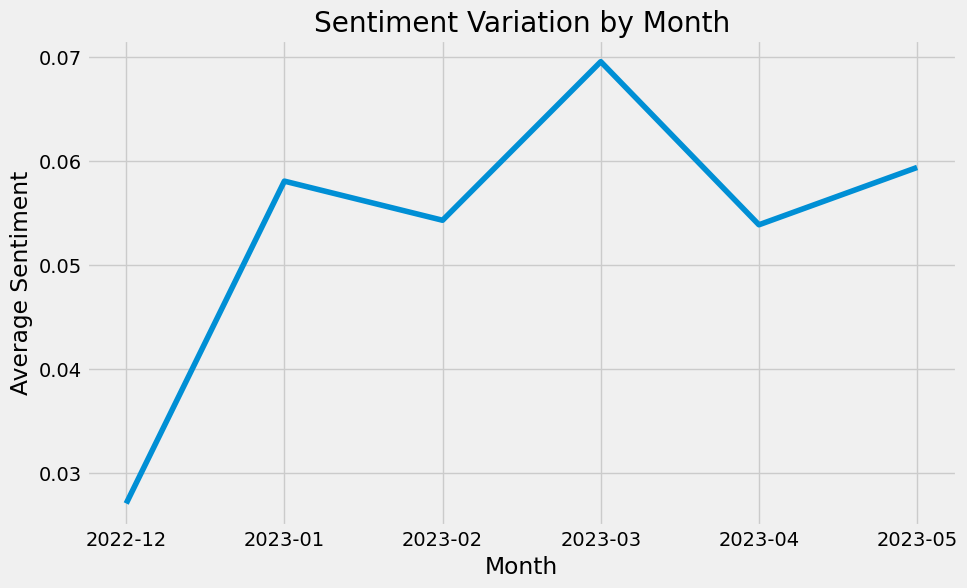

In [21]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Step 1: Convert 'Date' column to DateTime data type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 2: Perform sentiment analysis using TextBlob
df['Sentiment'] = df['clean_Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Step 3: Group data by month and calculate average sentiment
df['Month'] = df['Date'].dt.to_period('M')
monthly_sentiment = df.groupby('Month')['Sentiment'].mean()

# Step 4: Plot the sentiment variation line
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(monthly_sentiment.index.astype(str), monthly_sentiment.values)
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.title('Sentiment Variation by Month')

# Save the plot with tight bounding box
plt.savefig('sentiment_variationm.png', bbox_inches='tight')